In [1]:
import numpy as np 
import pandas as pd 

from wordcloud import WordCloud, STOPWORDS 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import os
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Kavya
[nltk_data]     Vidiyala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing Data 

Dataset from https://www.kaggle.com/c/fake-news/overview

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [4]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Exploratory Data Analysis

In [5]:
print(train.isnull().sum())
print("-"*20)
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
--------------------
id          0
title     122
author    503
text        7
dtype: int64


In [6]:
train = train.fillna(' ')
test = test.fillna(' ')

In [7]:
test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [8]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [9]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


# Creating Word Clouds

In [10]:
from tqdm import tqdm
real_words = ''
fake_words = ''
#iterating through each row in train where label is 1, to get only real words 
for val in tqdm(train[train['label']==1].total):
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "
    
#iterating through each row in train where label is 1, to get only real words
for val in tqdm(train[train['label']==0].total): 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

100%|████████████████████████████████████████████████████████████████████████████| 10387/10387 [11:59<00:00, 14.44it/s]


<h2> Plotting wordcloud on real words

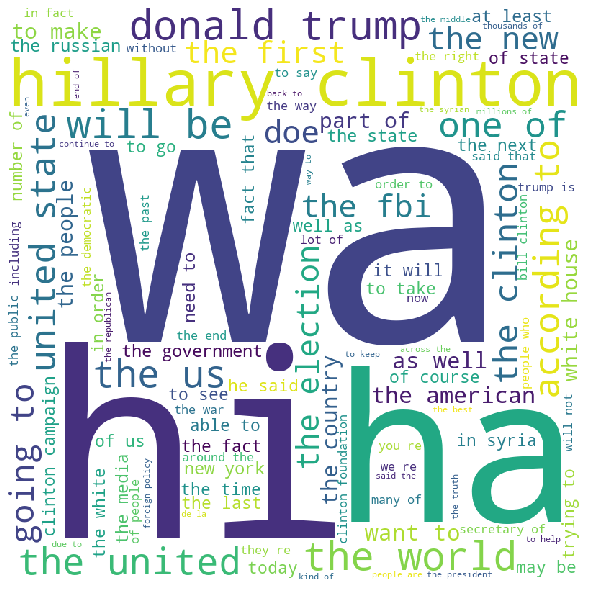

In [13]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords =set(STOPWORDS),
                      min_font_size = 10).generate(real_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<h2>  Plotting wordcloud on fake words

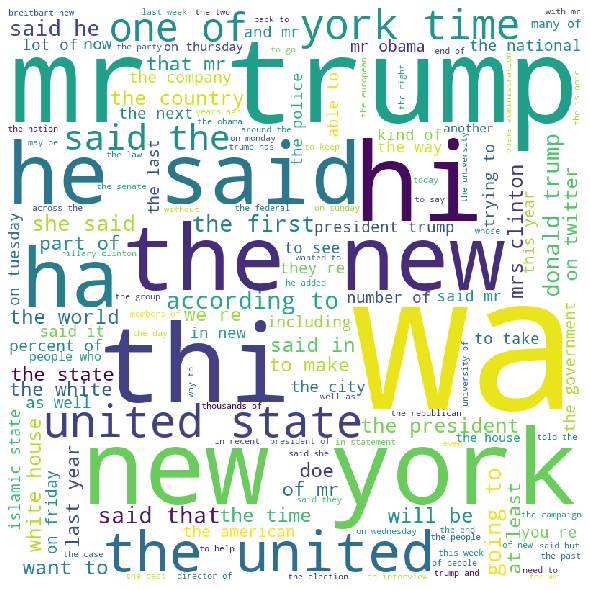

In [14]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = set(STOPWORDS),
                      min_font_size = 10).generate(fake_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Preprocessing Data

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Kavya
[nltk_data]     Vidiyala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

for index, row in tqdm(train.iterrows()):
    filter_sentence = ''
    sentence = row['total']
    
    #removing all one word characters and whitespaces using regular expressions
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization, spliting the sentence into tokens
    words = nltk.word_tokenize(sentence)

    # Stopwords removal
    words = [w for w in words if not w in stop_words]

    #lemmatization, getting tokens into their base form
    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()

    train.loc[index, 'total'] = filter_sentence

[nltk_data] Downloading package wordnet to C:\Users\Kavya
[nltk_data]     Vidiyala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
20800it [04:01, 86.24it/s] 


In [17]:
for index, row in tqdm(test.iterrows()):
    filter_sentence = ''
    sentence = row['total']
    
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization
    words = nltk.word_tokenize(sentence)

    # Stopwords removal
    words = [w for w in words if not w in stop_words]

    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()

    test.loc[index, 'total'] = filter_sentence

5200it [00:45, 113.75it/s]


In [18]:
train = train[['total', 'label']]

In [19]:
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [20]:
X_train = train['total']
Y_train = train['label']

In [21]:
test = test['total']

In [22]:
test.head()

0     specter trump loosens tongues not purse strin...
1     russian warship ready strike terrorist near a...
2     nodapl native american leaders vow stay all w...
3     tim tebow will attempt another comeback this ...
4     keiser report meme wars e995 truth broadcast ...
Name: total, dtype: object

# Processing data 

In [23]:
#TFIDF vectorizer , transformer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tf_idf_matrix = tfidf.fit_transform(tf_idf_matrix)

In [24]:
type(tf_idf_matrix)

scipy.sparse.csr.csr_matrix

In [25]:
tf_idf_matrix.shape

(20800, 210578)

In [27]:
tf_idf_matrix[tf_idf_matrix[0] !=0]

matrix([[0.01141714, 0.00904587, 0.01407992, 0.00997417, 0.06697381,
         0.03302052, 0.05149569, 0.01349068, 0.03438142, 0.01405434,
         0.01647723, 0.00821428, 0.0161014 , 0.01328188, 0.00890749,
         0.08879388, 0.01974215, 0.00492268, 0.00449229, 0.01069969,
         0.04738347, 0.00370045, 0.02412557, 0.01146677, 0.01901447,
         0.00855191, 0.02735548, 0.02856401, 0.01278712, 0.00459262,
         0.01116154, 0.01214656, 0.01647723, 0.00674358, 0.06157123,
         0.02423402, 0.02454007, 0.04996268, 0.01219803, 0.01381905,
         0.00728165, 0.0083453 , 0.01665486, 0.01744108, 0.09835573,
         0.64334569, 0.06025603, 0.08155625, 0.04014608, 0.02723676,
         0.0356295 , 0.01901447, 0.01693589, 0.00963098, 0.01581286,
         0.01171841, 0.12360611, 0.10026999, 0.072951  , 0.09835573,
         0.04948221, 0.02637798, 0.02222301, 0.00784275, 0.02528226,
         0.04288971, 0.0242888 , 0.00792145, 0.05423935, 0.02125576,
         0.05474672, 0.01975252, 0

# Cross Validation

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

<h2> Applying Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logistic classifier on training set: 0.99
Accuracy of Logistic classifier on test set: 0.96


array([[2432,  132],
       [  92, 2544]], dtype=int64)

<h2> Applying Naive Bayes classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.93
Accuracy of NB classifier on test set: 0.86


array([[2552,   12],
       [ 700, 1936]], dtype=int64)

<h2> Applying Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.97


array([[2468,   96],
       [  76, 2560]], dtype=int64)

For this dataset, clearly Decision Tree classifier gives better result than Logistic Regression, Naive Bayes Classifier.

# Pipeline

In [33]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [34]:
X_train.head()

0     house dem aide we didnt even see comeys lette...
1     flynn hillary clinton big woman campus breitb...
2     why truth might get you fired consortiumnewsc...
3     15 civilians killed in single us airstrike ha...
4     iranian woman jailed fictional unpublished st...
Name: total, dtype: object

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', DecisionTreeClassifier()),
])

In [43]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

In [44]:
test.head()

0     specter trump loosens tongues not purse strin...
1     russian warship ready strike terrorist near a...
2     nodapl native american leaders vow stay all w...
3     tim tebow will attempt another comeback this ...
4     keiser report meme wars e995 truth broadcast ...
Name: total, dtype: object

In [45]:
pred_label = pipeline.predict(test)

In [46]:
pred_label.shape

(5200,)